# 이원분산분석

In [1]:
import pandas as pd

# 예저를 위한 데이터 생성, 2*3*2 요인설꼐
df = pd.DataFrame({
    'drug' : ['A']*6 + ['B']*6,
    'dosage': [100,100,150,150,200,200]*2,
    'BP': [184,168,160,145,192,176,143,167,135,123,140,152]
})

# 처리 열 추가
df['treatment'] = df['drug'] + '-' + df['dosage'].astype(str)

df

,drug,dosage,BP,treatment
0,A,100,184,A-100
1,A,100,168,A-100
2,A,150,160,A-150
3,A,150,145,A-150
4,A,200,192,A-200
5,A,200,176,A-200
6,B,100,143,B-100
7,B,100,167,B-100
8,B,150,135,B-150
9,B,150,123,B-150


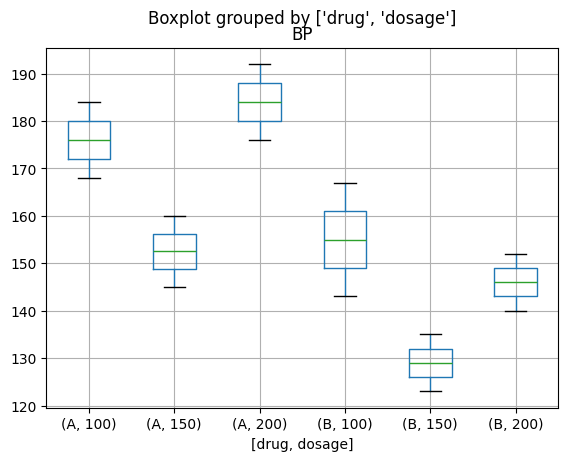

In [3]:
# 박스 플롯으로 시각화

df.boxplot(by=['drug','dosage']);

# r가정 확인

통계량: 0.9771, p-value: 0.9692
정규분포를 따름


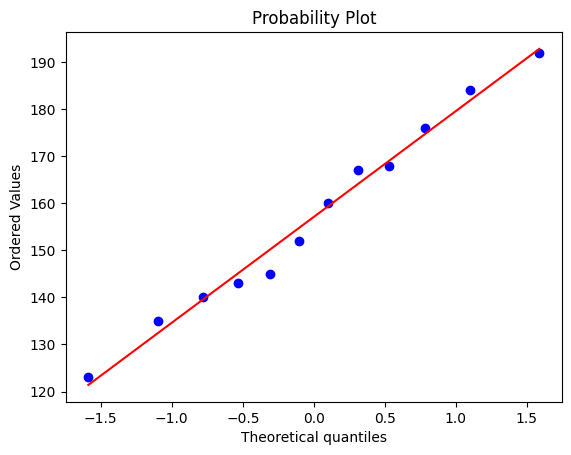

In [4]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Shapiro-Wilk 검정
stat, p_value = stats.shapiro(df.BP)
print(f'통계량: {stat:.4f}, p-value: {p_value:.4f}')
if p_value <0.05:
    print('정규분포를 따르지 않음')
else:
    print('정규분포를 따름')

# Q-Q 플롯
stats.probplot(df.BP, dist="norm",plot=plt)
plt.show()

In [ ]:
# Levene 검정
stat, p_value = stats.levene(df.BP[df.drug=='A'], df.BP[df.drug=='B'])
print(f'통계량:{stat:.4f}, p-value: {p_value:.4f}')
if p_value <0.05:
    print('모든 그룹의 분산이 같지 않음')
else:
    print('모든 그룹의 분산이 같음')

통계량: 0.2141, p-value: 0.6535
모든 그룹의 분산이 같음


# ANOVA Table 작성

In [6]:
#회귀분석을 위한 ols 함수와 anova_lm 함수 임포트
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 분산분석 모형을 formula 형태로 만들기. C() 함수는 범주형 변수임을 나타냄
formula = 'BP ~ C(drug) + C(dosage) + C(drug):C(dosage)'

#분산분석 모형 생성 및 적합
model = ols(formula, df).fit()

#분산분석 결과표 출력
result = anova_lm(model)
print(result)

                    df       sum_sq      mean_sq          F    PR(>F)
C(drug)            1.0  2268.750000  2268.750000  17.004997  0.006190
C(dosage)          2.0  1601.166667   800.583333   6.000625  0.037029
C(drug):C(dosage)  2.0   168.500000    84.250000   0.631480  0.563784
Residual           6.0   800.500000   133.416667        NaN       NaN


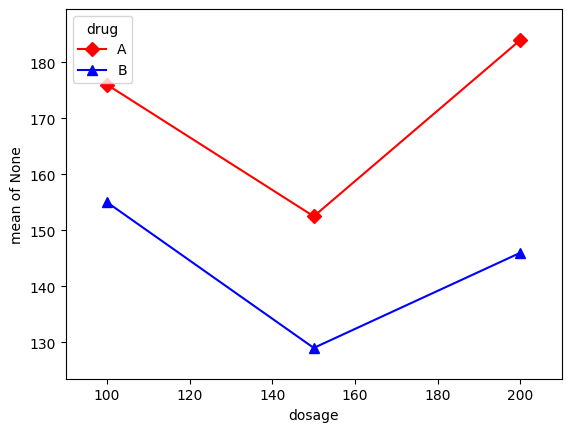

In [7]:
# 교호작용도 그래프 그리기
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig = interaction_plot(
    x = df['dosage'],           # x축 변수
    trace = df['drug'],        # 교호작용을 볼 변수
    response = model.fittedvalues, # y축 변수, 예측값
    colors=['red','blue'],     # 색상 지정
    markers=['D','^'],          # 마커 지정
    ms=7                      # 마커 크기
)
plt.show()

# 가설 검정

In [8]:
#교호 작용효과를 풀링한 모형
formula = 'BP ~ C(drug) + C(dosage)'

#분산분석 모형 생성 및 적합
model = ols(formula, df).fit()

#분산분석 결과표 출력
result = anova_lm(model)
print(result)

            df       sum_sq      mean_sq          F    PR(>F)
C(drug)    1.0  2268.750000  2268.750000  18.730650  0.002519
C(dosage)  2.0  1601.166667   800.583333   6.609563  0.020205
Residual   8.0   969.000000   121.125000        NaN       NaN


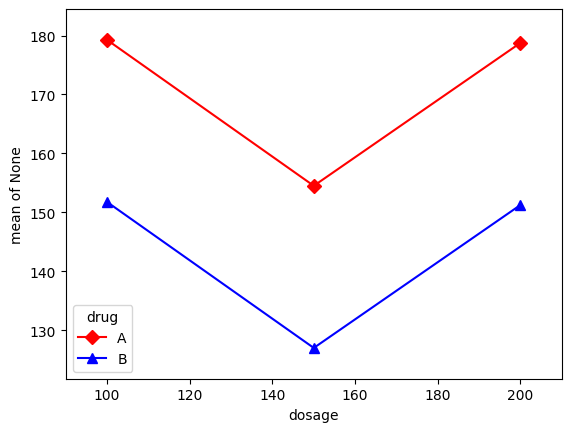

In [9]:
# 교호작용도 그래프 그리기
fig = interaction_plot(
    x = df['dosage'],           # x축 변수
    trace = df['drug'],        # 교호작용을 볼 변수
    response = model.fittedvalues, # y축 변수, 예측값
    colors=['red','blue'],     # 색상 지정
    markers=['D','^'],          # 마커 지정
    ms=7                      # 마커 크기
)
import matplotlib.pyplot as plt
plt.show()

# 사후검정

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper  reject
------------------------------------------------------
 A-100  A-150    -23.5 0.4196  -69.4697 22.4697  False
 A-100  A-200      8.0 0.9762  -37.9697 53.9697  False
 A-100  B-100    -21.0 0.5174  -66.9697 24.9697  False
 A-100  B-150    -47.0 0.0455  -92.9697 -1.0303   True
 A-100  B-200    -30.0   0.23  -75.9697 15.9697  False
 A-150  A-200     31.5  0.199  -14.4697 77.4697  False
 A-150  B-100      2.5 0.9999  -43.4697 48.4697  False
 A-150  B-150    -23.5 0.4196  -69.4697 22.4697  False
 A-150  B-200     -6.5 0.9902  -52.4697 39.4697  False
 A-200  B-100    -29.0 0.2531  -74.9697 16.9697  False
 A-200  B-150    -55.0 0.0226 -100.9697 -9.0303   True
 A-200  B-200    -38.0  0.106  -83.9697  7.9697  False
 B-100  B-150    -26.0 0.3353  -71.9697 19.9697  False
 B-100  B-200     -9.0 0.9616  -54.9697 36.9697  False
 B-150  B-200     17.0 0.6917  -28.9697 62.9697  False
----------

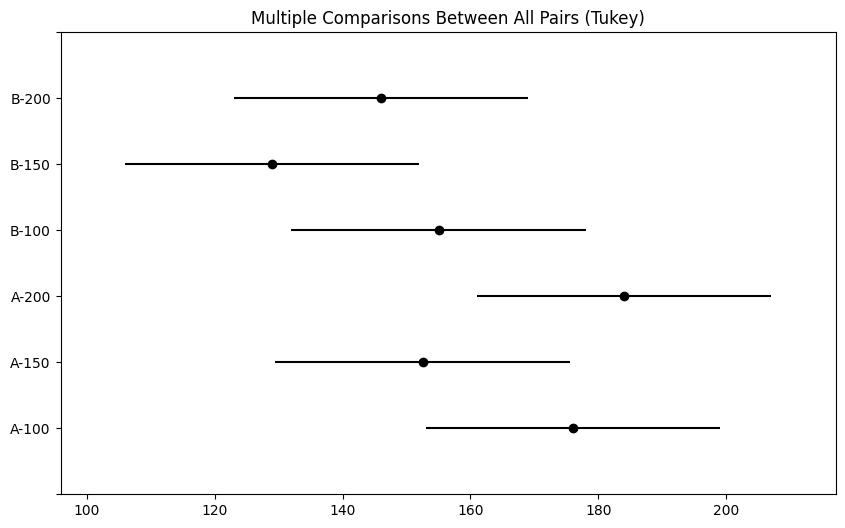

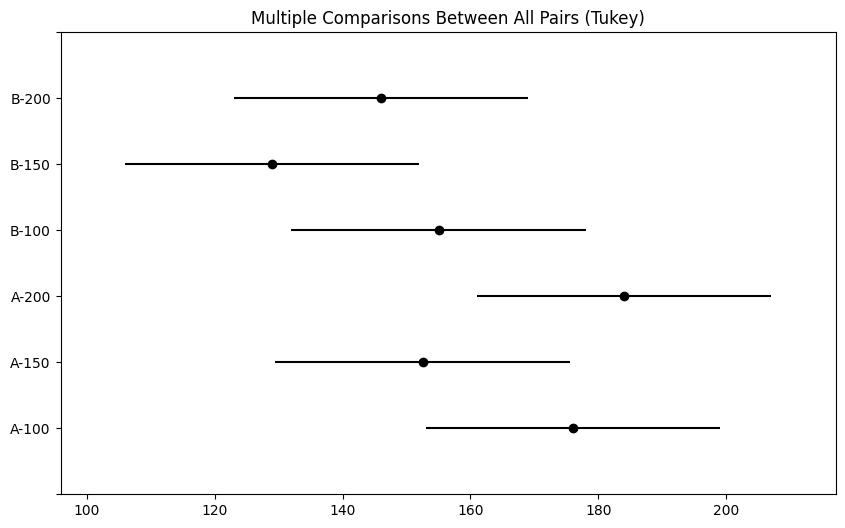

In [ ]:
# 사후검정을 위한 모듈 임포트
from statsmodels.stats.multicomp import MultiComparison

#사후검정 객체 생성 특성치는 'BP, 그룹구분은 'treatment'
posthoc = MultiComparison(
    data=df['BP'],
    groups=df['treatment']
)

# 사후검정 방법 적용 Tukey HSD 방법 사용
result = posthoc.tukeyhsd(alpha=0.05)
#사후검정 결과 요약
print(result.summary())

# 사후검정 결과 시각화
result.plot_simultaneous()


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    -27.5 0.014 -48.1235 -6.8765   True
----------------------------------------------------


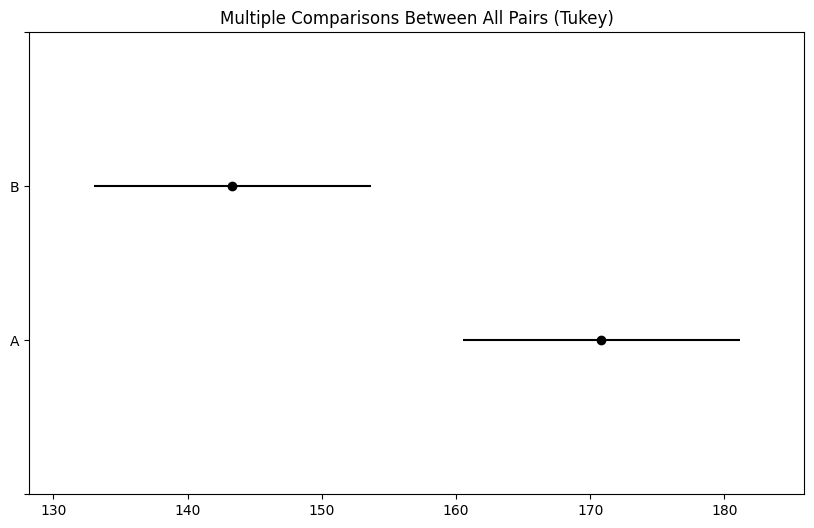

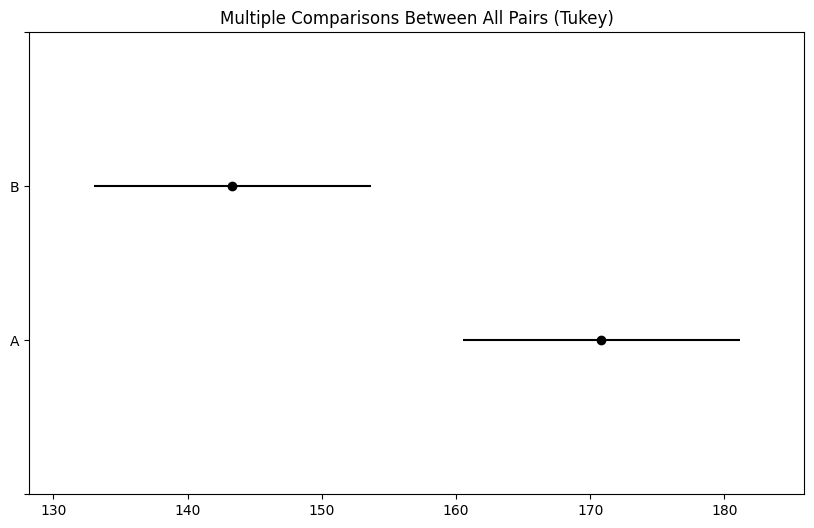

In [11]:
#사후검정 객체생성 특성치는 'BP',그룹구분은 'drug'
posthoc = MultiComparison(
    data=df['BP'],
    groups=df['drug']
)
# 사후검정 방법 적용 Tukey HSD 방법 사용
result = posthoc.tukeyhsd(alpha=0.05)
# 사후검정 결과 요약
print(result.summary())

# 사후검정 결과 시각화
result.plot_simultaneous()


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   100    150   -24.75 0.2099 -62.1957 12.6957  False
   100    200     -0.5 0.9992 -37.9457 36.9457  False
   150    200    24.25 0.2213 -13.1957 61.6957  False
-----------------------------------------------------


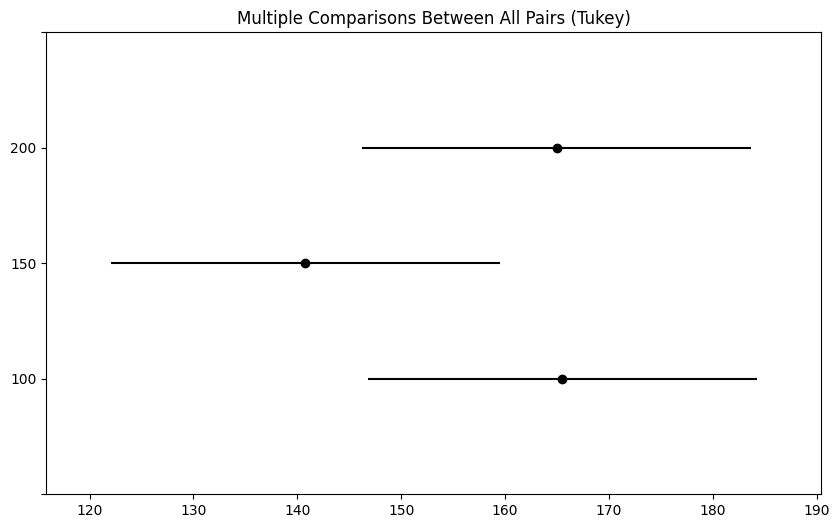

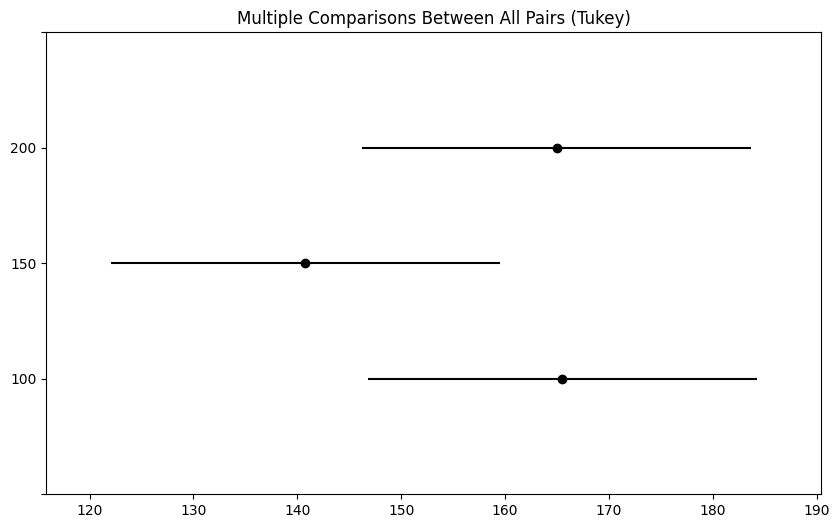

In [12]:
#사후검정 객체생성 특성치는 'BP',그룹구분은 'drug'
posthoc = MultiComparison(
    data=df['BP'],
    groups=df['dosage']
)
# 사후검정 방법 적용 Tukey HSD 방법 사용
result = posthoc.tukeyhsd(alpha=0.05)
# 사후검정 결과 요약
print(result.summary())

# 사후검정 결과 시각화
result.plot_simultaneous()


# 연습

In [28]:
import pandas as pd

# 예저를 위한 데이터 생성, 2*3*2 요인설꼐
df = pd.DataFrame({
    'exercise' : ['A']*6 + ['B']*6,
    'exercisetime': [60,60,80,80,70,70]*2,
    'weight': [75,62,49,89,93,76,56,66,88,45,68,90]
})

# 처리 열 추가
df['Health'] = df['exercise'] + '-' + df['exercisetime'].astype(str)

df

,exercise,exercisetime,weight,Health
0,A,60,75,A-60
1,A,60,62,A-60
2,A,80,49,A-80
3,A,80,89,A-80
4,A,70,93,A-70
5,A,70,76,A-70
6,B,60,56,B-60
7,B,60,66,B-60
8,B,80,88,B-80
9,B,80,45,B-80


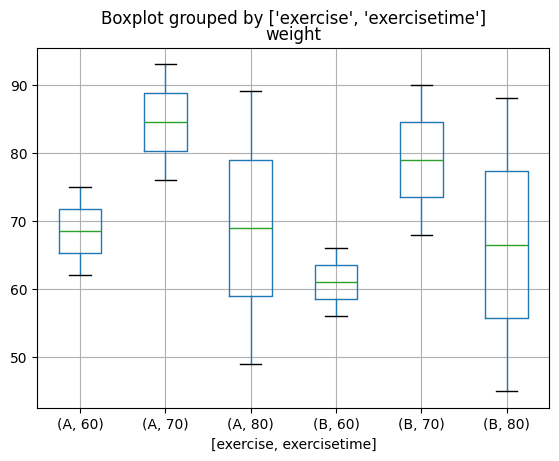

In [29]:
# 박스 플롯으로 시각화

df.boxplot(by=['exercise','exercisetime']);

가정검정

통계량: 0.9344, p-value: 0.4296
정규분포를 따름


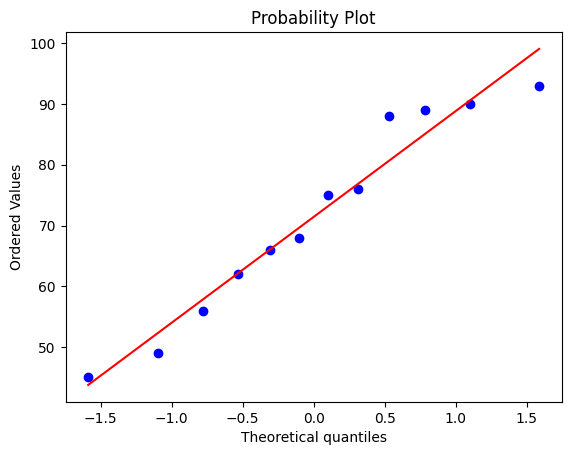

In [30]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Shapiro-Wilk 검정
stat, p_value = stats.shapiro(df.weight)
print(f'통계량: {stat:.4f}, p-value: {p_value:.4f}')
if p_value <0.05:
    print('정규분포를 따르지 않음')
else:
    print('정규분포를 따름')

# Q-Q 플롯
stats.probplot(df.weight, dist="norm",plot=plt)
plt.show()

In [31]:
# Levene 검정
stat, p_value = stats.levene(df.weight[df.exercise=='A'], df.weight[df.exercise=='B'])
print(f'통계량:{stat:.4f}, p-value: {p_value:.4f}')
if p_value <0.05:
    print('모든 그룹의 분산이 같지 않음')
else:
    print('모든 그룹의 분산이 같음')

통계량:0.0390, p-value: 0.8474
모든 그룹의 분산이 같음


ANOVA 테이블작성

In [32]:
#회귀분석을 위한 ols 함수와 anova_lm 함수 임포트
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 분산분석 모형을 formula 형태로 만들기. C() 함수는 범주형 변수임을 나타냄
formula = 'weight ~ C(exercise) + C(exercisetime) + C(exercise):C(exercisetime)'

#분산분석 모형 생성 및 적합
model = ols(formula, df).fit()

#분산분석 결과표 출력
result = anova_lm(model)
print(result)

                              df       sum_sq     mean_sq         F    PR(>F)
C(exercise)                  1.0    80.083333   80.083333  0.213984  0.659964
C(exercisetime)              2.0   658.666667  329.333333  0.879982  0.462247
C(exercise):C(exercisetime)  2.0    12.666667    6.333333  0.016923  0.983266
Residual                     6.0  2245.500000  374.250000       NaN       NaN


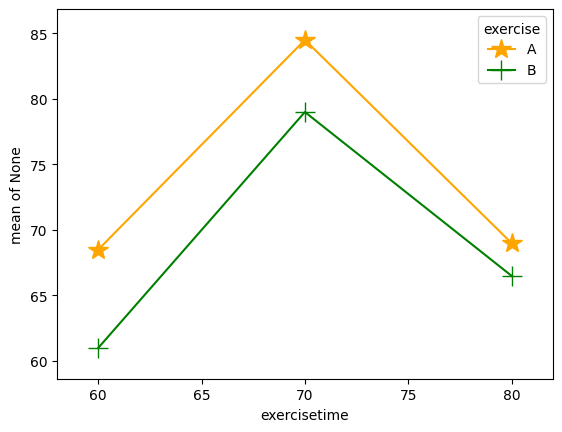

In [33]:
# 교호작용도 그래프 그리기
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig = interaction_plot(
    x = df['exercisetime'],           # x축 변수
    trace = df['exercise'],        # 교호작용을 볼 변수
    response = model.fittedvalues, # y축 변수, 예측값
    colors=['orange','green'],     # 색상 지정
    markers=['*','+'],          # 마커 지정
    ms=15                      # 마커 크기
)
plt.show()

사후검정

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper  reject
------------------------------------------------------
  A-60   A-70     16.0 0.9514  -60.9923 92.9923  False
  A-60   A-80      0.5    1.0  -76.4923 77.4923  False
  A-60   B-60     -7.5 0.9982  -84.4923 69.4923  False
  A-60   B-70     10.5 0.9917  -66.4923 87.4923  False
  A-60   B-80     -2.0    1.0  -78.9923 74.9923  False
  A-70   A-80    -15.5 0.9571  -92.4923 61.4923  False
  A-70   B-60    -23.5 0.8169 -100.4923 53.4923  False
  A-70   B-70     -5.5 0.9996  -82.4923 71.4923  False
  A-70   B-80    -18.0 0.9244  -94.9923 58.9923  False
  A-80   B-60     -8.0 0.9976  -84.9923 68.9923  False
  A-80   B-70     10.0 0.9933  -66.9923 86.9923  False
  A-80   B-80     -2.5    1.0  -79.4923 74.4923  False
  B-60   B-70     18.0 0.9244  -58.9923 94.9923  False
  B-60   B-80      5.5 0.9996  -71.4923 82.4923  False
  B-70   B-80    -12.5 0.9822  -89.4923 64.4923  False
----------

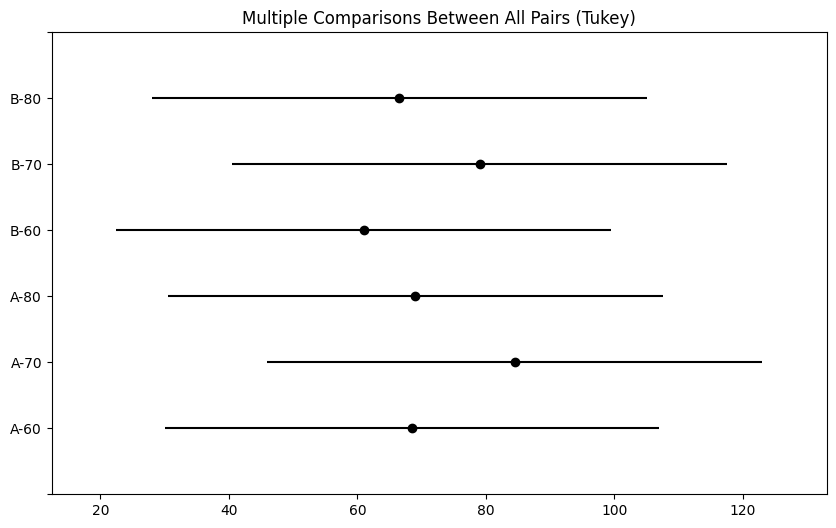

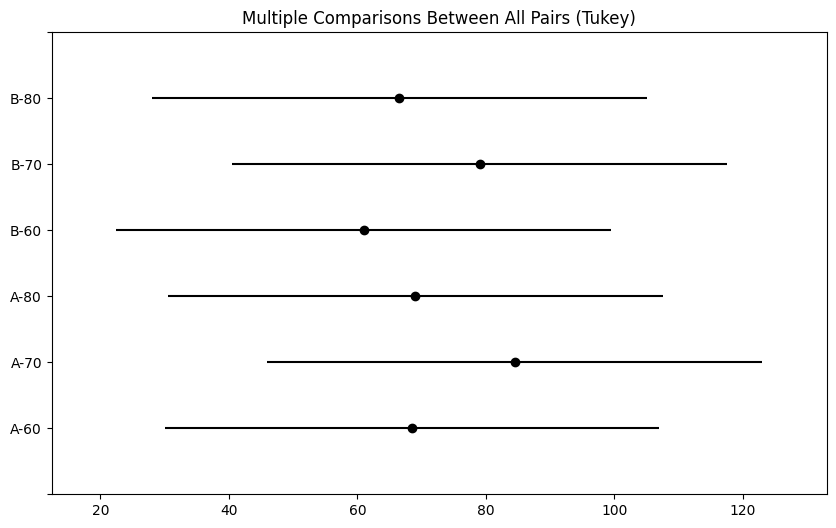

In [34]:
# 사후검정을 위한 모듈 임포트
from statsmodels.stats.multicomp import MultiComparison

#사후검정 객체 생성 특성치는 'weight, 그룹구분은 'Health'
posthoc = MultiComparison(
    data=df['weight'],
    groups=df['Health']
)

# 사후검정 방법 적용 Tukey HSD 방법 사용
result = posthoc.tukeyhsd(alpha=0.05)
#사후검정 결과 요약
print(result.summary())

# 사후검정 결과 시각화
result.plot_simultaneous()


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B  -5.1667 0.6117 -27.137 16.8037  False
----------------------------------------------------


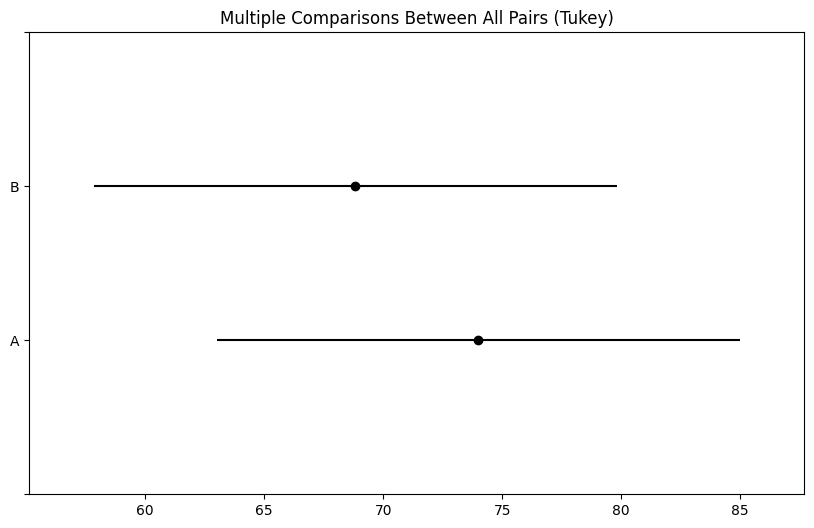

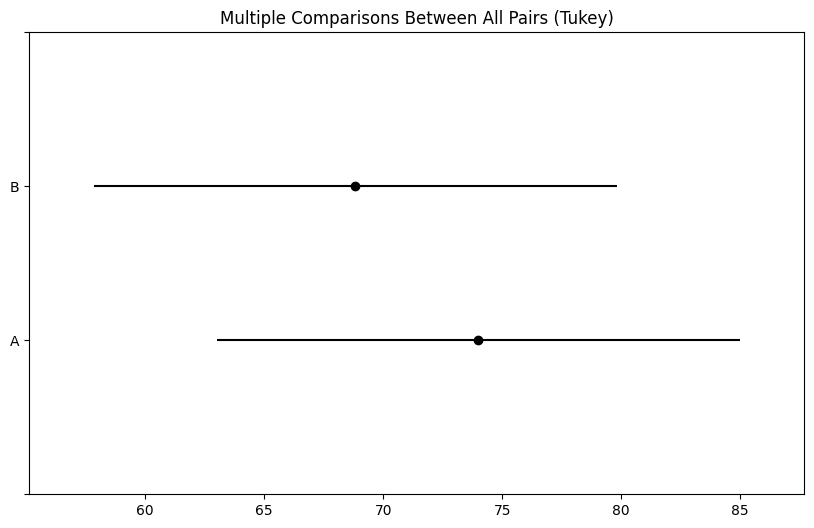

In [35]:
#사후검정 객체생성 특성치는 'weight',그룹구분은 'Health'
posthoc = MultiComparison(
    data=df['weight'],
    groups=df['exercise']
)
# 사후검정 방법 적용 Tukey HSD 방법 사용
result = posthoc.tukeyhsd(alpha=0.05)
# 사후검정 결과 요약
print(result.summary())

# 사후검정 결과 시각화
result.plot_simultaneous()


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    60     70     17.0 0.3394 -14.8219 48.8219  False
    60     80      3.0 0.9627 -28.8219 34.8219  False
    70     80    -14.0 0.4672 -45.8219 17.8219  False
-----------------------------------------------------


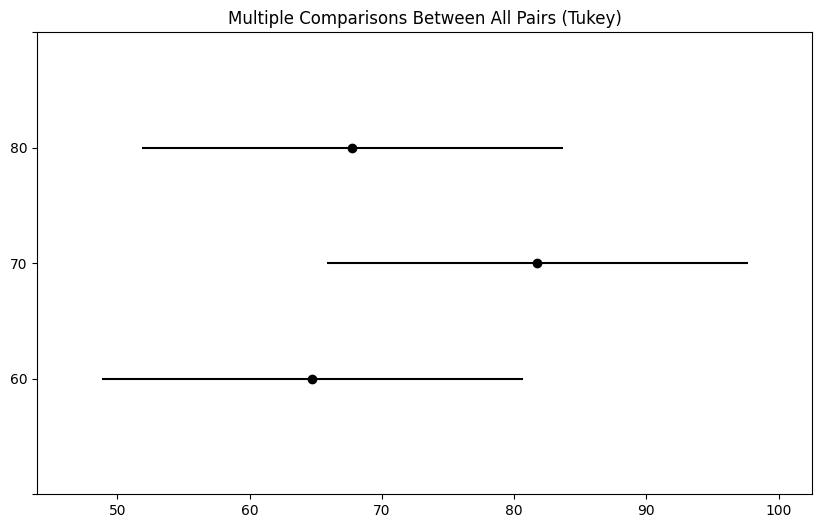

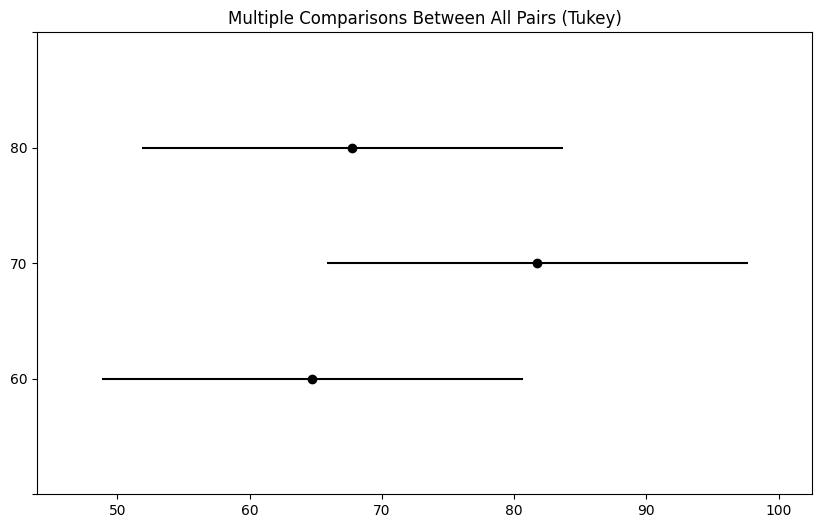

In [36]:
#사후검정 객체생성 특성치는 'weight',그룹구분은 'Health'
posthoc = MultiComparison(
    data=df['weight'],
    groups=df['exercisetime']
)
# 사후검정 방법 적용 Tukey HSD 방법 사용
result = posthoc.tukeyhsd(alpha=0.05)
# 사후검정 결과 요약
print(result.summary())

# 사후검정 결과 시각화
result.plot_simultaneous()
